# PREDICTION OF FOREX PRICES  USING THE CNN-LSTM 
# CURRENCY PAIR: GBPUSD

IMPORTING REQUIRED PYTHON LYBRARIES AND SETTING DESIRED PLOTTING STYLE

In [5]:
import numpy as np
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 
import os
plt.style.use('seaborn-whitegrid')
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

IMPORTING HISTORY DATASETS OF EUR VS USD FOREX

In [2]:
#df=yf.download(tickers='GBPUSD=X',start='2003-12-31',interval ='1d')

In [3]:
#df.to_csv("GBPUSD_csv")

In [6]:
url = r"GBPUSD_csv"
## Read dataset to pandas dataframe
df = pd.read_csv(url, index_col = 'Date')


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-30,1.774088,1.781515,1.772892,1.777999,1.777999,0
2003-12-31,1.777999,1.794398,1.777809,1.788813,1.788813,0
2004-01-01,1.788813,1.788813,1.781705,1.785204,1.785204,0
2004-01-02,1.785587,1.795010,1.779201,1.793690,1.793690,0
2004-01-05,1.795493,1.810315,1.795107,1.807207,1.807207,0


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,1.402761,1.407598,1.398152,1.403115,1.403115,0
2021-02-23,1.407024,1.411472,1.405738,1.407123,1.407123,0
2021-02-24,1.412090,1.421707,1.408709,1.412031,1.412031,0
2021-02-25,1.414547,1.418218,1.410059,1.414827,1.414827,0
2021-02-26,1.400541,1.402013,1.389082,1.400815,1.400815,0


In [7]:
#get the number of rows and columns in the data set
df.shape

(4442, 6)

PREDICTION IS DONE USING CLOSING PRICE ONLY, SO TAKING OUT ONLY THE CLOSE PRICES

In [7]:
data = df.filter(['Close']).values
data

array([[1.77799892],
       [1.78881276],
       [1.78520429],
       ...,
       [1.41203058],
       [1.41482747],
       [1.40081525]])

PLOTTING THE CLOSE PRICES OF HISTORY DATASETS

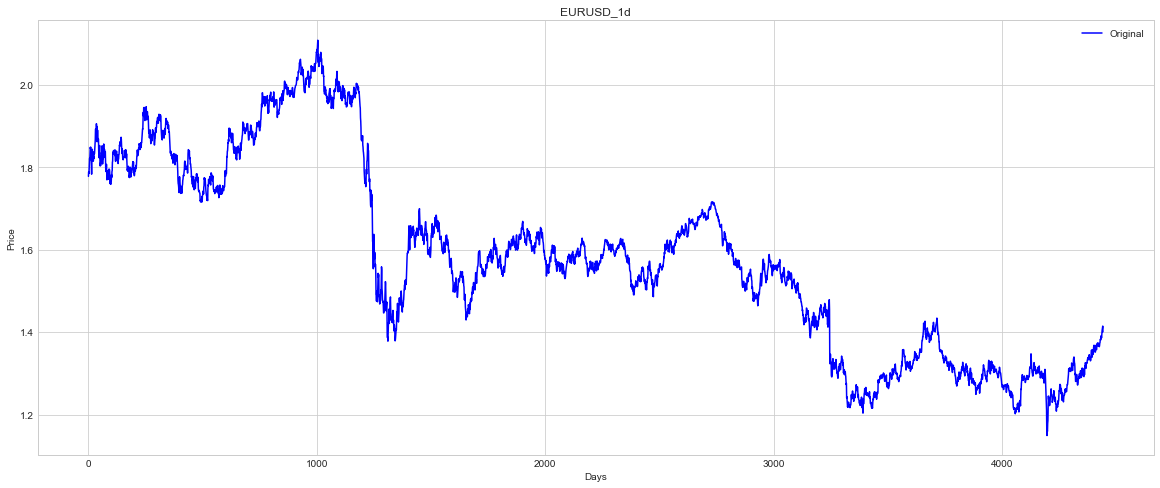

In [9]:
plt.figure(figsize = (20,8))
plt.plot(data,'b',label = 'Original')
plt.xlabel("Days")
plt.ylabel('Price')
plt.title("EURUSD_1d")
plt.legend()

DATA PREPROCESSING USING SCIKIT LEARN PYTHON LIBRARY

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.6556014 ],
       [0.66688044],
       [0.66311674],
       ...,
       [0.27388891],
       [0.27680613],
       [0.2621911 ]])

DATA SPLITTING INTO TRAINING, AND TESTING DATA SETS

In [9]:
training_size = int(len(scaled_data)*0.80) #Training size is 80% of the given data
print("Training_size:",training_size)
x_train_1 = scaled_data[0:training_size,:]
print(len(x_train_1))
test_data_1= scaled_data[training_size:,:1]
print(len(test_data_1))

Training_size: 3553
3553
889


In [13]:
print(len(x_train_1)), print(test_data_1)

3553
[[0.15095098]
 [0.15340105]
 [0.14911924]
 [0.16133703]
 [0.16222456]
 [0.16796809]
 [0.17765524]
 [0.17473641]
 [0.18720425]
 [0.17852784]
 [0.19866334]
 [0.21702828]
 [0.21092304]
 [0.21078975]
 [0.20810854]
 [0.21750897]
 [0.20995197]
 [0.20687585]
 [0.20377549]
 [0.19864457]
 [0.20191055]
 [0.19813926]
 [0.1857873 ]
 [0.18219382]
 [0.18131649]
 [0.16879257]
 [0.16580424]
 [0.1720644 ]
 [0.17905553]
 [0.18204747]
 [0.18461194]
 [0.18716745]
 [0.18342016]
 [0.17736454]
 [0.17925584]
 [0.17274937]
 [0.17683822]
 [0.1785823 ]
 [0.17080411]
 [0.18556685]
 [0.17062432]
 [0.17101996]
 [0.17920113]
 [0.18751746]
 [0.18367654]
 [0.16259769]
 [0.16542924]
 [0.17529755]
 [0.17498981]
 [0.16882838]
 [0.17210045]
 [0.16958212]
 [0.1699054 ]
 [0.17350746]
 [0.17794594]
 [0.17818231]
 [0.18259617]
 [0.18265101]
 [0.19008379]
 [0.18903028]
 [0.19087955]
 [0.19065736]
 [0.1951518 ]
 [0.20055726]
 [0.21231563]
 [0.20856423]
 [0.20661064]
 [0.20035086]
 [0.19795213]
 [0.20755834]
 [0.19793348]
 

(None, None)

In [10]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
       # find the end of this pattern
       end_ix = i + n_steps
       # check if we are beyond the sequence
       if end_ix > len(sequence)-1:
          break
       # gather input and output parts of the pattern
       seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
       X.append(seq_x)
       y.append(seq_y)
    return np.array(X), np.array(y)

In [12]:
#Split into samples
time_step = 120
x_train, y_train = split_sequence(x_train_1, time_step)
x_test, y_test = split_sequence(test_data_1, time_step)


In [16]:
print(x_train.shape),print(y_train.shape)

(3433, 120, 1)
(3433, 1)


(None, None)

In [17]:
print(x_test[-1]), print(y_test[-2:])

[[0.13704355]
 [0.13686227]
 [0.14135919]
 [0.14502019]
 [0.15286653]
 [0.15448901]
 [0.15002566]
 [0.13831789]
 [0.1303425 ]
 [0.12757014]
 [0.13169902]
 [0.13271822]
 [0.14384371]
 [0.14311807]
 [0.1484401 ]
 [0.14517599]
 [0.14985134]
 [0.15626492]
 [0.1448644 ]
 [0.1484401 ]
 [0.15082875]
 [0.16034445]
 [0.16389628]
 [0.15028751]
 [0.15832818]
 [0.14682346]
 [0.14950257]
 [0.15168507]
 [0.15224484]
 [0.17080411]
 [0.16517957]
 [0.16273994]
 [0.15868143]
 [0.1603621 ]
 [0.1559833 ]
 [0.1499385 ]
 [0.149398  ]
 [0.1491017 ]
 [0.16972585]
 [0.15357637]
 [0.17157799]
 [0.17587709]
 [0.17473641]
 [0.18431838]
 [0.18042213]
 [0.16972585]
 [0.18003929]
 [0.18020329]
 [0.18406162]
 [0.18378658]
 [0.18303546]
 [0.18886404]
 [0.19136111]
 [0.19492824]
 [0.19724167]
 [0.19401622]
 [0.19165778]
 [0.19217702]
 [0.20112076]
 [0.19571095]
 [0.20449267]
 [0.20057603]
 [0.19431376]
 [0.19517045]
 [0.19531953]
 [0.18891949]
 [0.19023175]
 [0.1915465 ]
 [0.20339837]
 [0.20949527]
 [0.21650954]
 [0.19

(None, None)

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [19]:
x_train.shape, x_test.shape

((3433, 120, 1), (769, 120, 1))

BUILDING A CNN-LSTM MODEL USING KERAS

In [20]:
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D ,MaxPooling1D, Dropout
from keras.layers.recurrent import LSTM
from keras.utils.vis_utils import plot_model
from keras.metrics import RootMeanSquaredError as rmse
from keras import optimizers

In [21]:
# define model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2,activation='relu',padding = 'same',input_shape=(120,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss= 'mse' , metrics = [rmse()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 120, 256)          768       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 60, 100)           142800    
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

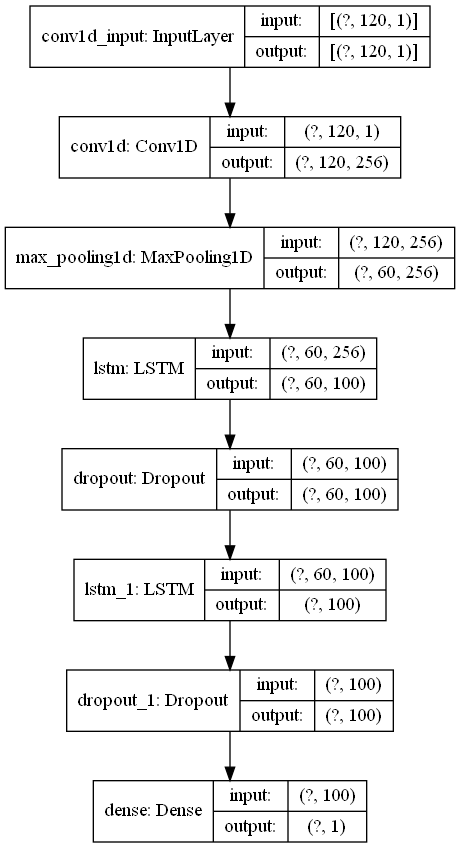

In [22]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

TRAINING THE MODEL FOR 200 EPOCHS

In [23]:
history = model.fit(x_train, y_train, epochs = 250, validation_data = (x_test,y_test), batch_size=32, verbose=1)

Epoch 1/250
108/108 [==============================] - 17s 157ms/step - loss: 0.0072 - root_mean_squared_error: 0.0846 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 2/250
108/108 [==============================] - 16s 152ms/step - loss: 0.0014 - root_mean_squared_error: 0.0369 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 3/250
108/108 [==============================] - 16s 146ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0362
Epoch 4/250
108/108 [==============================] - 15s 143ms/step - loss: 8.5323e-04 - root_mean_squared_error: 0.0292 - val_loss: 8.1338e-04 - val_root_mean_squared_error: 0.0285
Epoch 5/250
108/108 [==============================] - 16s 148ms/step - loss: 8.5442e-04 - root_mean_squared_error: 0.0292 - val_loss: 8.6247e-04 - val_root_mean_squared_error: 0.0294
Epoch 6/250
108/108 [==============================] - 16s 152ms/step - loss: 7.0347e-04 - root_mean_squ

108/108 [==============================] - 16s 152ms/step - loss: 3.3690e-04 - root_mean_squared_error: 0.0184 - val_loss: 1.8362e-04 - val_root_mean_squared_error: 0.0136
Epoch 46/250
108/108 [==============================] - 15s 141ms/step - loss: 3.1788e-04 - root_mean_squared_error: 0.0178 - val_loss: 2.4869e-04 - val_root_mean_squared_error: 0.0158
Epoch 47/250
108/108 [==============================] - 16s 145ms/step - loss: 3.2480e-04 - root_mean_squared_error: 0.0180 - val_loss: 4.2169e-04 - val_root_mean_squared_error: 0.0205
Epoch 48/250
108/108 [==============================] - 16s 146ms/step - loss: 3.1799e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.8803e-04 - val_root_mean_squared_error: 0.0137
Epoch 49/250
108/108 [==============================] - 17s 153ms/step - loss: 3.0265e-04 - root_mean_squared_error: 0.0174 - val_loss: 2.3527e-04 - val_root_mean_squared_error: 0.0153
Epoch 50/250
108/108 [==============================] - 17s 155ms/step - loss: 3.0828e-0

108/108 [==============================] - 16s 146ms/step - loss: 2.6352e-04 - root_mean_squared_error: 0.0162 - val_loss: 1.1093e-04 - val_root_mean_squared_error: 0.0105
Epoch 134/250
108/108 [==============================] - 16s 148ms/step - loss: 2.5943e-04 - root_mean_squared_error: 0.0161 - val_loss: 2.9814e-04 - val_root_mean_squared_error: 0.0173
Epoch 135/250
108/108 [==============================] - 16s 146ms/step - loss: 2.5479e-04 - root_mean_squared_error: 0.0160 - val_loss: 1.3409e-04 - val_root_mean_squared_error: 0.0116
Epoch 136/250
108/108 [==============================] - 16s 146ms/step - loss: 2.6245e-04 - root_mean_squared_error: 0.0162 - val_loss: 1.2534e-04 - val_root_mean_squared_error: 0.0112
Epoch 137/250
108/108 [==============================] - 16s 146ms/step - loss: 2.6562e-04 - root_mean_squared_error: 0.0163 - val_loss: 1.3069e-04 - val_root_mean_squared_error: 0.0114
Epoch 138/250
108/108 [==============================] - 15s 142ms/step - loss: 2.53

108/108 [==============================] - 15s 139ms/step - loss: 2.3523e-04 - root_mean_squared_error: 0.0153 - val_loss: 1.2605e-04 - val_root_mean_squared_error: 0.0112
Epoch 222/250
108/108 [==============================] - 17s 154ms/step - loss: 2.6098e-04 - root_mean_squared_error: 0.0162 - val_loss: 1.1171e-04 - val_root_mean_squared_error: 0.0106
Epoch 223/250
108/108 [==============================] - 16s 146ms/step - loss: 2.3603e-04 - root_mean_squared_error: 0.0154 - val_loss: 1.3835e-04 - val_root_mean_squared_error: 0.0118
Epoch 224/250
108/108 [==============================] - 16s 146ms/step - loss: 2.5874e-04 - root_mean_squared_error: 0.0161 - val_loss: 1.0320e-04 - val_root_mean_squared_error: 0.0102
Epoch 225/250
108/108 [==============================] - 14s 132ms/step - loss: 2.4110e-04 - root_mean_squared_error: 0.0155 - val_loss: 1.0635e-04 - val_root_mean_squared_error: 0.0103
Epoch 226/250
108/108 [==============================] - 15s 135ms/step - loss: 2.34

MODEL EVALUATION

In [24]:
history.history.keys()


dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

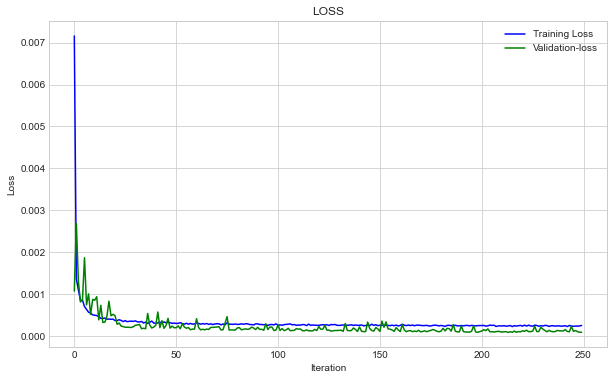

In [25]:
### Plotting iteration-loss graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'],label='Training Loss',color='b')
plt.plot(history.history['val_loss'],label='Validation-loss',color='g')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title('LOSS')
plt.legend()

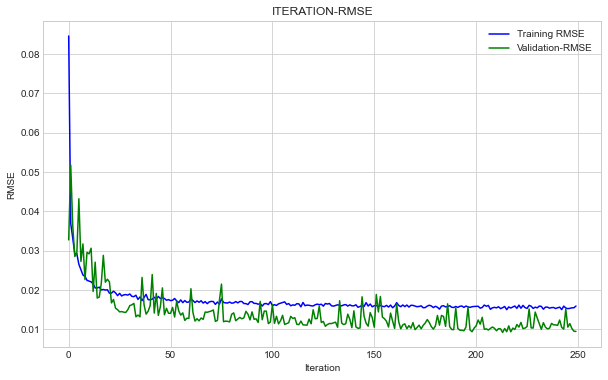

In [26]:
### Plotting iteration-rmse graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['root_mean_squared_error'],label='Training RMSE',color='b')
plt.plot(history.history['val_root_mean_squared_error'],label='Validation-RMSE',color='g')
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title('ITERATION-RMSE')
plt.legend()

In [27]:
#evaluate training data
model.evaluate(x_train,y_train, batch_size = 32)

108/108 [==============================] - 5s 44ms/step - loss: 1.2165e-04 - root_mean_squared_error: 0.0110


[0.00012165193766122684, 0.011029593646526337]

In [28]:
#evaluate testing data
model.evaluate(x_test,y_test, batch_size = 32)

25/25 [==============================] - 1s 41ms/step - loss: 8.9492e-05 - root_mean_squared_error: 0.0095


[8.949243783717975e-05, 0.009460044093430042]

PREDICTION USING TRAINING DATA

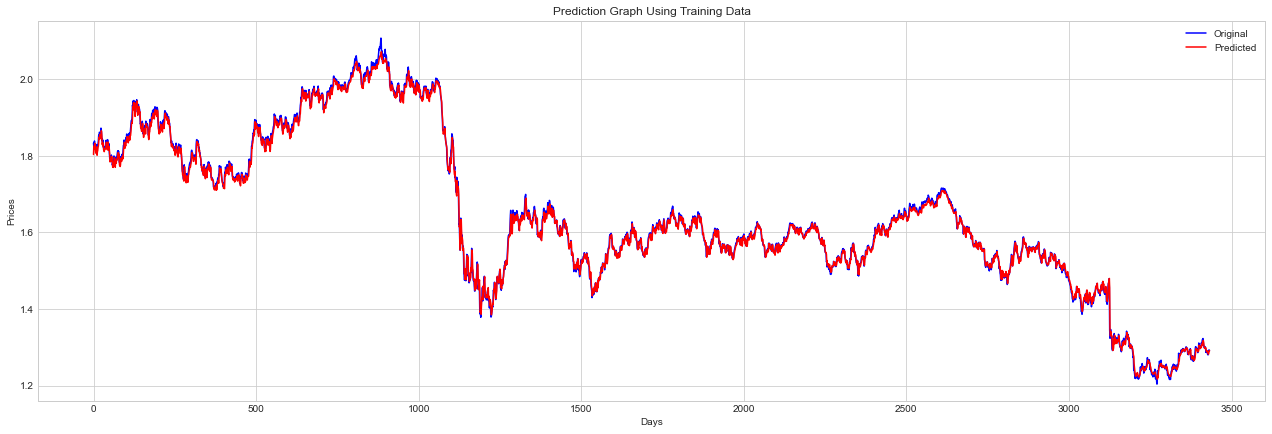

In [14]:
# prediction using training data
train_predict = model.predict(x_train)
plot_y_train = y_train.reshape(-1,1)

# Actual vs predicted training data graph
plt.figure(figsize=(22,7))
plt.plot(scaler.inverse_transform(plot_y_train),color = 'b', label = 'Original')
plt.plot(scaler.inverse_transform(train_predict),color='red', label = 'Predicted')
plt.title("Prediction Graph Using Training Data")
plt.xlabel("Days")
plt.ylabel('Prices')
plt.legend()
plt.show()


PREDICTION USING TESTING DATA

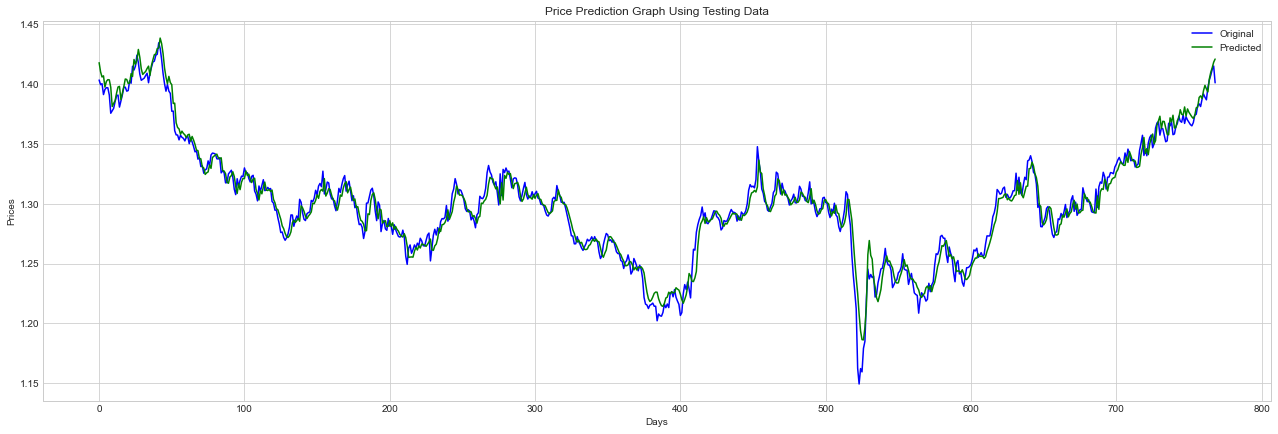

In [15]:
# prediction using testing data
test_predict = model.predict(x_test)
plot_y_test = y_test.reshape(-1,1)

# Actual vs predicted testing data graph
plt.figure(figsize=(22,7))
plt.plot(scaler.inverse_transform(plot_y_test),color = 'b',  label = 'Original')
plt.plot(scaler.inverse_transform(test_predict),color='g', label = 'Predicted')
plt.title("Price Prediction Graph Using Testing Data")
plt.xlabel("Days")
plt.ylabel('Prices')
plt.legend()
plt.show()

   COMPARING THE LAST 5 ACTUAL VALUES AND THE LAST 5 PREDICTED VALUES

In [31]:
last_actual_five = scaler.inverse_transform(y_test[-5:])
last_predicted_five = scaler.inverse_transform(test_predict[-5:])

In [32]:
compare = pd.DataFrame(last_actual_five, columns = ['Actual_Prices'])
compare['Predicted_Prices'] = last_predicted_five

In [33]:
print(compare)

   Actual_Prices  Predicted_Prices
0       1.403115          1.403955
1       1.407123          1.409605
2       1.412031          1.413461
3       1.414827          1.418007
4       1.400815          1.420664


VISUALIZATION OF THE GRAPH OF HISTORY DATA SETS WITH PREDICTION OF TRAINING AND TESTING DATA

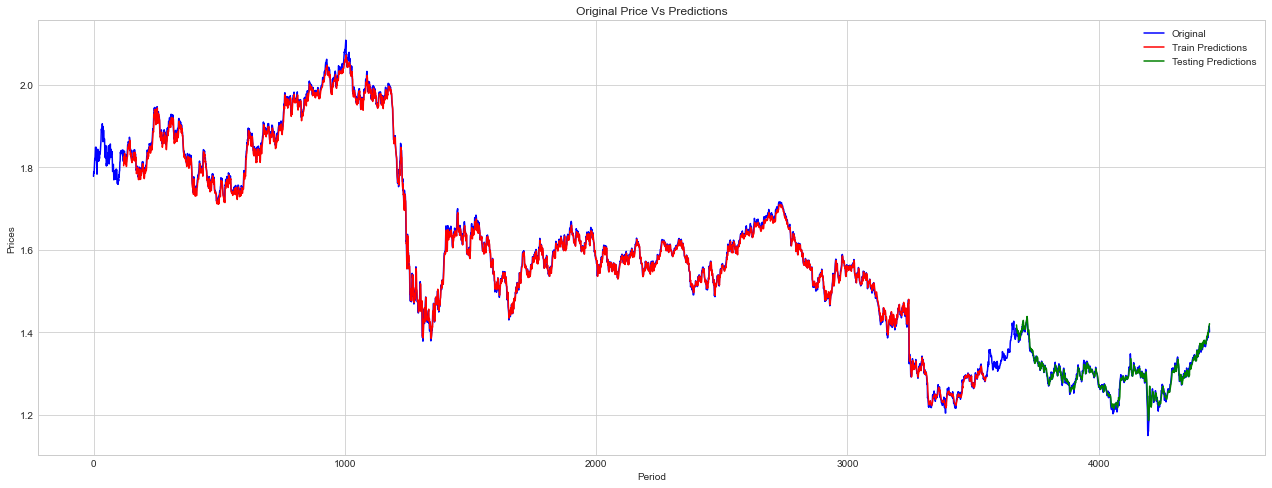

In [34]:
### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(data), :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(22,8))
plt.plot(data,color = 'b', label = 'Original')
plt.plot(scaler.inverse_transform(trainPredictPlot),color='red',label = 'Train Predictions')
plt.plot(scaler.inverse_transform(testPredictPlot),color='green', label = 'Testing Predictions')
plt.title("Original Price Vs Predictions")
plt.xlabel('Period')
plt.ylabel('Prices')
plt.legend()
plt.show()



SAVING MODELS FOR THE APPLICATION PURPOSES

In [35]:
model.save('gbpusd.h5')

In [1]:
#from keras.models import load_model

In [4]:
#model = load_model('gbpusd.h5')